In [1]:
from utils import *
%matplotlib inline

In [2]:
power_df_list = []

In [6]:
st = "2020-12-20 00:00:00"
et = "2021-02-04 23:59:59"

In [7]:
power_df = get_data_section(client, '_power', st, et, uuid_dict, '1T')
power_df = power_df.tz_convert(tz_local).tz_localize(None).resample('1T').mean()
power_df.tail()

,building,freezer,ref_comp,ref_fan,hvac_west,hvac_east
2021-02-04 10:39:00,29954.841797,3749.601318,11.960033,256.264130,378.306122,NaN
2021-02-04 10:40:00,NaN,NaN,NaN,NaN,NaN,878.473755
2021-02-04 10:41:00,28082.328125,3784.930176,7.792377,43.519798,377.696350,882.439575
2021-02-04 10:42:00,34015.839844,3808.134521,4255.955566,249.009430,379.114319,880.453613
2021-02-04 10:43:00,29686.074219,3793.724609,13.241374,462.106262,379.606689,880.346680


In [8]:
power_df.head()

,building,freezer,ref_comp,ref_fan,hvac_west,hvac_east
2020-12-20 20:17:00,37540.605469,3730.037109,12.259354,456.202637,2697.062256,2489.989014
2020-12-20 20:18:00,35754.347656,3765.550781,10.838198,216.461914,2698.007568,2497.940918
2020-12-20 20:19:00,NaN,NaN,NaN,NaN,NaN,2496.166016
2020-12-20 20:20:00,33648.566406,3734.262207,647.388672,457.444641,2697.855225,2499.256104
2020-12-20 20:21:00,33238.058594,3771.458252,9.301728,455.571136,NaN,NaN


AttributeError: 'function' object has no attribute 'savefig'

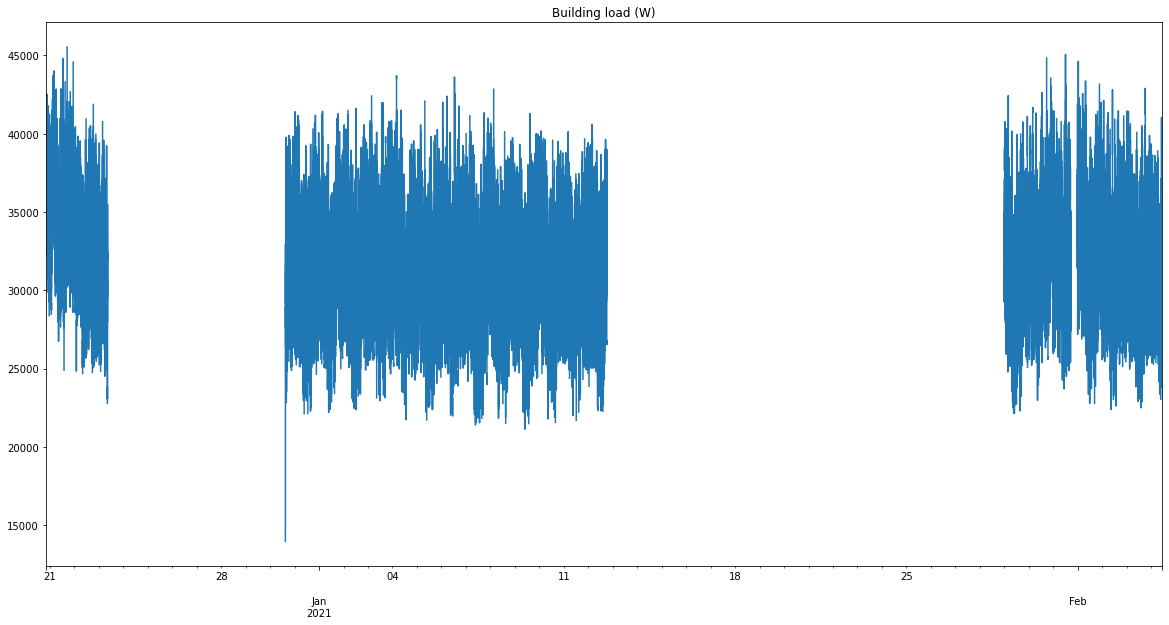

In [24]:
power_df.building.plot(figsize=(20,10), title="Building load (W)")
plt.savefig('~/Desktop/building_load.png')


In [10]:
energy_df = get_data_section(client, '_energy', st, et, uuid_dict, '1T')
energy_df = energy_df.tz_convert(tz_local).tz_localize(None).resample('1T').mean()
energy_df.head()

,building
2020-12-20 20:17:00,810403.6875
2020-12-20 20:18:00,810404.3750
2020-12-20 20:19:00,NaN
2020-12-20 20:20:00,810405.8750
2020-12-20 20:21:00,810406.5000


In [15]:
power_df.to_csv('sample_data/wattnode_power2.csv')

In [14]:
energy_df.to_csv('sample_data/building_energy2.csv')

In [13]:
power_df.tail()

,building,freezer,ref_comp,ref_fan,hvac_west,hvac_east
2020-12-20 19:56:00,NaN,NaN,NaN,455.539642,NaN,NaN
2020-12-20 19:57:00,39769.019531,3861.611084,14.329454,NaN,2655.876221,2485.716064
2020-12-20 19:58:00,41299.414062,3838.401367,8.543434,251.709503,2607.245361,2487.505371
2020-12-20 19:59:00,45942.398438,3881.792480,4272.770508,55.943836,2581.820312,2485.092773
2020-12-20 20:00:00,42471.945312,3813.294922,2682.222168,457.801270,2583.001221,2484.781738


In [22]:
power_df_list.append(power_df)

In [26]:
pd.concat(power_df_list, axis=0).to_csv('sample_data/acuvim_meters.csv')

In [2]:
rtac_df_list = []

In [14]:
st = "2020-12-01 00:00:00"
et = "2020-12-30 23:59:59"

In [16]:
rtac_df = get_data_section(client, '_rtac', st, et, uuid_dict, '1T')
rtac_df = rtac_df.tz_convert(tz_local).tz_localize(None).resample('1T').mean()
rtac_df.head()

,bess_power,island_type,pv_generation,islanding_state
2020-12-20 20:17:00,147.0,0.0,0.0,0.0
2020-12-20 20:18:00,146.0,0.0,0.0,0.0
2020-12-20 20:19:00,-1047.0,0.0,0.0,0.0
2020-12-20 20:20:00,156.0,0.0,0.0,0.0
2020-12-20 20:21:00,150.0,0.0,0.0,0.0


In [17]:
rtac_df.tail()

,bess_power,island_type,pv_generation,islanding_state
2021-02-04 10:41:00,8501.0,0.0,26237.349609,0.0
2021-02-04 10:42:00,9215.0,0.0,25811.072266,0.0
2021-02-04 10:43:00,4096.0,0.0,26492.837891,0.0
2021-02-04 10:44:00,3747.0,0.0,26336.908203,0.0
2021-02-04 10:45:00,1077.0,0.0,26221.646484,0.0


In [18]:
rtac_df.to_csv("sample_data/rtac_meters2.csv")

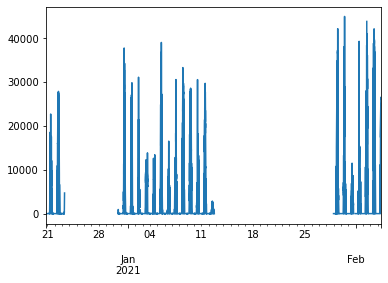

In [19]:
rtac_df.pv_generation.plot()

In [16]:
rtac_df_list.append(rtac_df)

NameError: name 'rtac_df_list' is not defined

In [20]:
`pd.concat(rtac_df_list, axis=0).to_csv('sample_data/rtac_meters.csv')

In [6]:
rtac_df['building_load'] = power_df['building']
rtac_df.to_csv('sample_data/rtac.csv')

In [7]:
rtac_df

,bess_power,island_type,pv_generation,islanding_state,building_load
2020-08-17 00:00:00,-5999.0,0.0,0.0,0.0,30382.558594
2020-08-17 00:01:00,-5576.0,0.0,0.0,0.0,27333.298828
2020-08-17 00:02:00,-5955.0,0.0,0.0,0.0,31749.375000
2020-08-17 00:03:00,-5953.0,0.0,0.0,0.0,NaN
2020-08-17 00:04:00,-5978.0,0.0,0.0,0.0,30705.521484
...,...,...,...,...,...
2020-08-20 23:55:00,-41964.0,0.0,0.0,0.0,NaN
2020-08-20 23:56:00,-42121.0,0.0,0.0,0.0,33545.230469
2020-08-20 23:57:00,-42183.0,0.0,0.0,0.0,33263.675781
2020-08-20 23:58:00,-42108.0,0.0,0.0,0.0,32824.781250
